In [1]:
# ===============================
#  1. Import neccessary files
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import re

# ===============================
#  2. Load Dataset

try:
    df = pd.read_csv("/content/sentence_transformation_dataset_1000.csv", encoding='latin-1')
    print(" Dataset loaded successfully with latin-1 encoding!")
except UnicodeDecodeError:
    try:
        df = pd.read_csv("/content/sentence_transformation_dataset_1000.csv", encoding='cp1252')
        print(" Dataset loaded successfully with cp1252 encoding!")
    except UnicodeDecodeError:
        print("Could not decode the file with 'latin-1' or 'cp1252' encoding. Please check the file encoding.")
        df = None # Or handle the error as appropriate

if df is not None:
    print(f"Total samples: {len(df)}")
    display(df.head(10))

 Dataset loaded successfully with latin-1 encoding!
Total samples: 946


,original_sentence,transformed_sentence,label
0,"Ethan said, ""I like coffee.""",Ethan said that he liked coffee.,Direct to Indirect
1,The boy will designed the homework.,The homework will be designed by the boy.,Active to Passive
2,The manager is amazing.,The manager is not amazing.,Positive to Negative
3,Arjun said that he was calm.,"Arjun said, ""I am calm.""",Indirect to Direct
4,The nurse finisheds the song.,The song is finisheded by the nurse.,Active to Passive
5,The actor is not smart.,The actor is smart.,Negative to Positive
6,The police officer is tasty.,The police officer is not tasty.,Positive to Negative
7,The police officer brokes the painting.,The painting is brokeed by the police officer.,Active to Passive
8,Mary said that he liked chocolate.,"Mary said, ""I like chocolate.""",Indirect to Direct
9,The customers are served efficiently by the wa...,The waiter serves the customers efficiently.,Passive to Active



Class Distribution:
label
Direct to Indirect      170
Active to Passive       170
Indirect to Direct      170
Passive to Active       170
Positive to Negative    135
Negative to Positive    131
Name: count, dtype: int64


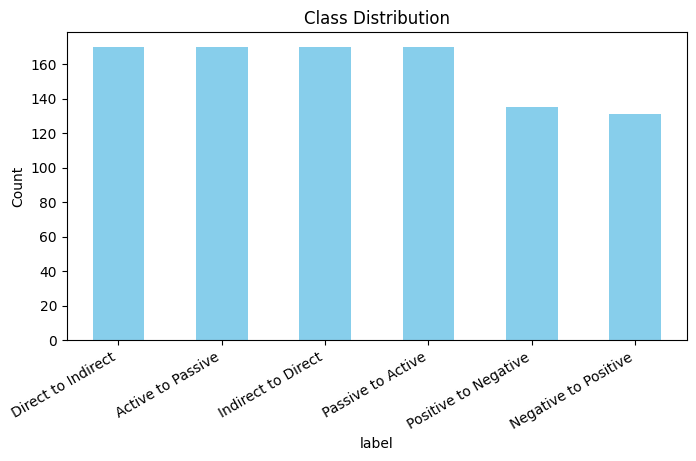


Missing values:
 original_sentence       0
transformed_sentence    0
label                   0
dtype: int64

Duplicate rows: 0


In [2]:
# ===============================
#  3. Basic Exploration
# ===============================
print("\nClass Distribution:")
print(df['label'].value_counts())

plt.figure(figsize=(8,4))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xticks(rotation=30, ha='right')
plt.show()

# Check for missing values or duplicates
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())


In [3]:
# ===============================
#  4. Basic Cleaning Function
# ===============================
def clean_text(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)         # remove extra spaces
    text = re.sub(r'\s([?.!,"](?:\s|$))', r'\1', text)  # space before punctuations
    return text

df['original_sentence'] = df['original_sentence'].apply(clean_text)
df['transformed_sentence'] = df['transformed_sentence'].apply(clean_text)

df.head(10)


,original_sentence,transformed_sentence,label
0,"Ethan said, ""I like coffee.""",Ethan said that he liked coffee.,Direct to Indirect
1,The boy will designed the homework.,The homework will be designed by the boy.,Active to Passive
2,The manager is amazing.,The manager is not amazing.,Positive to Negative
3,Arjun said that he was calm.,"Arjun said, ""I am calm.""",Indirect to Direct
4,The nurse finisheds the song.,The song is finisheded by the nurse.,Active to Passive
5,The actor is not smart.,The actor is smart.,Negative to Positive
6,The police officer is tasty.,The police officer is not tasty.,Positive to Negative
7,The police officer brokes the painting.,The painting is brokeed by the police officer.,Active to Passive
8,Mary said that he liked chocolate.,"Mary said, ""I like chocolate.""",Indirect to Direct
9,The customers are served efficiently by the wa...,The waiter serves the customers efficiently.,Passive to Active


In [4]:
# ===============================
#  4. Basic Cleaning Function
# ===============================
def clean_text(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)         # remove extra spaces
    text = re.sub(r'\s([?.!,"](?:\s|$))', r'\1', text)  # space before punctuations
    return text

df['original_sentence'] = df['original_sentence'].apply(clean_text)
df['transformed_sentence'] = df['transformed_sentence'].apply(clean_text)

df.head(10)


,original_sentence,transformed_sentence,label
0,"Ethan said, ""I like coffee.""",Ethan said that he liked coffee.,Direct to Indirect
1,The boy will designed the homework.,The homework will be designed by the boy.,Active to Passive
2,The manager is amazing.,The manager is not amazing.,Positive to Negative
3,Arjun said that he was calm.,"Arjun said, ""I am calm.""",Indirect to Direct
4,The nurse finisheds the song.,The song is finisheded by the nurse.,Active to Passive
5,The actor is not smart.,The actor is smart.,Negative to Positive
6,The police officer is tasty.,The police officer is not tasty.,Positive to Negative
7,The police officer brokes the painting.,The painting is brokeed by the police officer.,Active to Passive
8,Mary said that he liked chocolate.,"Mary said, ""I like chocolate.""",Indirect to Direct
9,The customers are served efficiently by the wa...,The waiter serves the customers efficiently.,Passive to Active


In [5]:
#Train test split
# ===============================
train_df, temp_df = train_test_split(df, test_size=0.4, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

train_df['label'].value_counts()


Train: 567 | Val: 189 | Test: 190


,count
label,
Direct to Indirect,102
Active to Passive,102
Passive to Active,102
Indirect to Direct,102
Positive to Negative,81
Negative to Positive,78


In [18]:
# 1) Check duplicates inside the whole dataset
print("TOTAL rows:", len(df))
print("Unique pairs:", len(df[['original_sentence','transformed_sentence']].drop_duplicates()))
print("Duplicate rows in full df:", len(df) - len(df[['original_sentence','transformed_sentence']].drop_duplicates()))

# 2) Check overlap between splits by exact text_pair (if using text_pair)
for name, part in [('train', train_df), ('val', val_df), ('test', test_df)]:
    print(f"{name} size: {len(part)}, unique pairs: {len(part[['original_sentence','transformed_sentence']].drop_duplicates())}")

# 3) Overlap between train and val sets (exact match)
train_pairs = set(train_df['original_sentence'] + " ||| " + train_df['transformed_sentence'])
val_pairs   = set(val_df['original_sentence']   + " ||| " + val_df['transformed_sentence'])
test_pairs  = set(test_df['original_sentence']  + " ||| " + test_df['transformed_sentence'])

print("Train ∩ Val:", len(train_pairs & val_pairs))
print("Train ∩ Test:", len(train_pairs & test_pairs))
print("Val ∩ Test:", len(val_pairs & test_pairs))

# 4) A few example overlaps (if any)
overlap = train_pairs & val_pairs
if len(overlap)>0:
    print("Examples of overlap (train vs val):")
    for i, ex in enumerate(list(overlap)[:10]):
        o,t = ex.split(" ||| ")
        print(i, "ORIG:", o, "| TRANS:", t)


TOTAL rows: 946
Unique pairs: 945
Duplicate rows in full df: 1
train size: 567, unique pairs: 567
val size: 189, unique pairs: 189
test size: 190, unique pairs: 190
Train ∩ Val: 1
Train ∩ Test: 0
Val ∩ Test: 0
Examples of overlap (train vs val):
0 ORIG: I know the answer. | TRANS: I donÂt know the answer.


In [19]:
from sklearn.model_selection import train_test_split

# start from the cleaned unique dataset (no duplicates)
df_unique = df[['original_sentence','transformed_sentence','label']].drop_duplicates().reset_index(drop=True)

# 1) First get train and temp (val+test)
train_df, temp_df = train_test_split(
    df_unique,
    test_size=0.4,
    stratify=df_unique['label'],
    random_state=42,
    shuffle=True
)

# 2) Split temp into val and test (equal halves)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['label'],
    random_state=42,
    shuffle=True
)

# Quick sizes
print("Train / Val / Test sizes:", len(train_df), len(val_df), len(test_df))

# Verify zero overlap
def pairset(df):
    return set(df['original_sentence'] + " ||| " + df['transformed_sentence'])

print("Train∩Val:", len(pairset(train_df) & pairset(val_df)))
print("Train∩Test:", len(pairset(train_df) & pairset(test_df)))
print("Val∩Test:", len(pairset(val_df) & pairset(test_df)))


Train / Val / Test sizes: 567 189 189
Train∩Val: 0
Train∩Test: 0
Val∩Test: 0


In [20]:
import os
if os.path.exists("preprocessed_data.pt"):
    os.remove("preprocessed_data.pt")


In [21]:
import os
if os.path.exists("preprocessed_data(new).pt"):
    os.remove("preprocessed_data(new).pt")


In [23]:
import os
if os.path.exists("preprocessed_data(try).pt"):
    os.remove("preprocessed_data(try).pt")


In [24]:
# ===============================
#  8. Tokenize Whole Dataset (Bias-Resistant Version)
# ===============================

from sklearn.preprocessing import LabelEncoder
import numpy as np
import random
import torch

# ✅ Add small random noise to break memorization patterns
def add_noise(sentence):
    noise_words = ["actually", "maybe", "probably", "honestly", "really"]
    if random.random() < 0.3:
        words = sentence.split()
        insert_pos = random.randint(0, len(words))
        words.insert(insert_pos, random.choice(noise_words))
        sentence = " ".join(words)
    if random.random() < 0.3:
        sentence = sentence.replace(".", " .").replace(",", " ,")
    return sentence

# Apply noise only to training data (validation/test stay clean)
train_df['original_sentence'] = train_df['original_sentence'].apply(add_noise)
train_df['transformed_sentence'] = train_df['transformed_sentence'].apply(add_noise)

# ✅ Randomize input order to avoid positional bias
def make_pairs(df):
    pairs = []
    for i, row in df.iterrows():
        if np.random.rand() > 0.5:
            text = row['original_sentence'] + " " + tokenizer.sep_token + " " + row['transformed_sentence']
        else:
            text = row['transformed_sentence'] + " " + tokenizer.sep_token + " " + row['original_sentence']
        pairs.append(text)
    return pairs

train_df['text_pair'] = make_pairs(train_df)
val_df['text_pair']   = make_pairs(val_df)
test_df['text_pair']  = make_pairs(test_df)

# ✅ Tokenize
def tokenize_batch(texts, tokenizer, max_len=128):
    return tokenizer(
        list(texts),
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='pt'
    )

X_train = tokenize_batch(train_df['text_pair'], tokenizer)
X_val   = tokenize_batch(val_df['text_pair'], tokenizer)
X_test  = tokenize_batch(test_df['text_pair'], tokenizer)

# ✅ Encode labels
le = LabelEncoder()
train_labels = le.fit_transform(train_df['label'])
val_labels   = le.transform(val_df['label'])
test_labels  = le.transform(test_df['label'])

print("\nEncoded label mapping:")
print(dict(zip(le.classes_, range(len(le.classes_)))))

# ✅ Save preprocessed dataset
torch.save({
    'train_input': X_train,
    'val_input': X_val,
    'test_input': X_test,
    'train_labels': torch.tensor(train_labels),
    'val_labels': torch.tensor(val_labels),
    'test_labels': torch.tensor(test_labels),
    'label_encoder': le
}, "preprocessed_data(acc).pt")

print("✅ Tokenization complete and saved as 'preprocessed_data(acc).pt'")



Encoded label mapping:
{'Active to Passive': 0, 'Direct to Indirect': 1, 'Indirect to Direct': 2, 'Negative to Positive': 3, 'Passive to Active': 4, 'Positive to Negative': 5}
✅ Tokenization complete and saved as 'preprocessed_data(acc).pt'


In [22]:
# ===============================
#  8. Tokenize Whole Dataset (Clean Split)
# ===============================

from sklearn.preprocessing import LabelEncoder
import torch

# ✅ Create 'text_pair' column with spaces around SEP token
train_df['text_pair'] = train_df['original_sentence'] + " " + tokenizer.sep_token + " " + train_df['transformed_sentence']
val_df['text_pair']   = val_df['original_sentence']   + " " + tokenizer.sep_token + " " + val_df['transformed_sentence']
test_df['text_pair']  = test_df['original_sentence']  + " " + tokenizer.sep_token + " " + test_df['transformed_sentence']

# ✅ Tokenization function
def tokenize_batch(texts, tokenizer, max_len=128):
    return tokenizer(
        list(texts),
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='pt'
    )

X_train = tokenize_batch(train_df['text_pair'], tokenizer)
X_val   = tokenize_batch(val_df['text_pair'], tokenizer)
X_test  = tokenize_batch(test_df['text_pair'], tokenizer)

# ✅ Encode labels
le = LabelEncoder()
train_labels = le.fit_transform(train_df['label'])
val_labels   = le.transform(val_df['label'])
test_labels  = le.transform(test_df['label'])

print("\nEncoded label mapping:")
print(dict(zip(le.classes_, range(len(le.classes_)))))

# ✅ Save preprocessed data
torch.save({
    'train_input': X_train,
    'val_input': X_val,
    'test_input': X_test,
    'train_labels': torch.tensor(train_labels),
    'val_labels': torch.tensor(val_labels),
    'test_labels': torch.tensor(test_labels),
    'label_encoder': le
}, "preprocessed_data(try).pt")

print("✅ Tokenization complete and saved as 'preprocessed_data(try).pt'")



Encoded label mapping:
{'Active to Passive': 0, 'Direct to Indirect': 1, 'Indirect to Direct': 2, 'Negative to Positive': 3, 'Passive to Active': 4, 'Positive to Negative': 5}
✅ Tokenization complete and saved as 'preprocessed_data(try).pt'
